In [1]:
! uptime

 12:58:52 up 6 min,  0 users,  load average: 0.24, 0.13, 0.06


In [0]:
# Notebook ran on Google Colab
# Pickled models were stored at GDrive/My Drive/Colab Notebooks/

## Load tools

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Matlab Processing to Pandas
# source: https://github.com/sigopt/stanford-car-classification/blob/master/stanford_cars.py
from scipy.io import loadmat
import numpy as np
from torch.utils.data import Dataset
import torchvision
from enum import Enum
import os
from PIL import Image
import math

In [0]:
# FastAI code
# source: https://www.kaggle.com/khursani8/fast-ai-ootb-cutout-efficientnet
from fastai.vision import *
from fastai.metrics import *
PATH = Path('')

In [0]:
# For plotting
import cv2
import matplotlib.pyplot as plt

In [7]:
!pip install efficientnet_pytorch

In [0]:
from efficientnet_pytorch import EfficientNet

## Get data

In [9]:
! wget http://imagenet.stanford.edu/internal/car196/car_ims.tgz

--2019-06-17 13:05:55--  http://imagenet.stanford.edu/internal/car196/car_ims.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1956628579 (1.8G) [application/x-gzip]
Saving to: ‘car_ims.tgz’

car_ims.tgz         100%[===================>]   1.82G  6.40MB/s    in 3m 20s  

2019-06-17 13:09:16 (9.32 MB/s) - ‘car_ims.tgz’ saved [1956628579/1956628579]



In [10]:
! tar -xvzf car_ims.tgz

car_ims/
car_ims/011348.jpg
car_ims/014416.jpg
car_ims/014864.jpg
car_ims/006611.jpg
car_ims/015256.jpg
car_ims/010508.jpg
car_ims/015983.jpg
car_ims/007051.jpg
car_ims/008684.jpg
car_ims/008123.jpg
car_ims/004144.jpg
car_ims/005704.jpg
car_ims/012988.jpg
car_ims/009763.jpg
car_ims/010169.jpg
car_ims/015637.jpg
car_ims/007397.jpg
car_ims/015190.jpg
car_ims/007842.jpg
car_ims/007430.jpg
car_ims/003289.jpg
car_ims/014077.jpg
car_ims/011729.jpg
car_ims/006270.jpg
car_ims/005365.jpg
car_ims/000849.jpg
car_ims/009302.jpg
car_ims/004282.jpg
car_ims/016085.jpg
car_ims/008930.jpg
car_ims/008542.jpg
car_ims/004525.jpg
car_ims/004957.jpg
car_ims/004253.jpg
car_ims/008234.jpg
car_ims/004986.jpg
car_ims/008593.jpg
car_ims/016054.jpg
car_ims/009806.jpg
car_ims/009474.jpg
car_ims/005413.jpg
car_ims/005861.jpg
car_ims/000898.jpg
car_ims/006974.jpg
car_ims/006506.jpg
car_ims/003258.jpg
car_ims/014701.jpg
car_ims/002418.jpg
car_ims/007346.jpg
car_ims/007893.jpg
car_ims/015141.jpg
car_ims/009015.jpg
car

In [11]:
! wget http://imagenet.stanford.edu/internal/car196/cars_annos.mat

--2019-06-17 13:09:46--  http://imagenet.stanford.edu/internal/car196/cars_annos.mat
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394471 (385K) [text/plain]
Saving to: ‘cars_annos.mat’

cars_annos.mat      100%[===================>] 385.23K   216KB/s    in 1.8s    

2019-06-17 13:09:48 (216 KB/s) - ‘cars_annos.mat’ saved [394471/394471]



## Load data

In [0]:
validation_percentage = 0 # set to %validation set, 0 because will be set instead using fastai
data_subset = 1 # use 100% of data

In [0]:

data_struct = loadmat('cars_annos.mat')
annotations = data_struct['annotations']
annotations_labels = annotations['class']

validation_struct = np.array([])
training_struct = np.array([])

unique_labels = np.unique(annotations_labels)


In [0]:
for label in unique_labels:
    class_label = label[0][0]
    class_struct = annotations[annotations['class'] == class_label]
    class_struct = np.reshape(class_struct, (class_struct.shape[0], 1))
    np.random.shuffle(class_struct)

    #subset data
    class_struct = class_struct[:math.ceil(class_struct.shape[0] * data_subset)]

    # split data into training and validation
    class_struct_shape = class_struct.shape
    validation_split = math.floor(class_struct_shape[0] * validation_percentage)
    validation_data_points = class_struct[:validation_split]
    training_data_points = class_struct[validation_split:]

    if validation_struct.shape[0] == 0:
        validation_struct = validation_data_points
    else:
        validation_struct = np.append(validation_struct, validation_data_points)

    if training_struct.shape[0] == 0:
        training_struct = training_data_points
    else:
        training_struct = np.append(training_struct, training_data_points)

# shuffle training and validation data
validation_struct = np.reshape(validation_struct, (validation_struct.shape[0],1))
np.random.shuffle(validation_struct)

training_struct = np.reshape(training_struct, (training_struct.shape[0],1))
np.random.shuffle(training_struct)

# return training_struct, validation_struct, unique_labels

In [15]:
training_struct.shape, validation_struct.shape, unique_labels.shape

((16185, 1), (0, 1), (196,))

In [16]:
training_struct

array([[(array(['car_ims/007286.jpg'], dtype='<U18'), array([[127]], dtype=uint8), array([[50]], dtype=uint8), array([[751]], dtype=uint16), array([[549]], dtype=uint16), array([[89]], dtype=uint8), array([[1]], dtype=uint8))],
       [(array(['car_ims/005474.jpg'], dtype='<U18'), array([[35]], dtype=uint8), array([[64]], dtype=uint8), array([[487]], dtype=uint16), array([[306]], dtype=uint16), array([[68]], dtype=uint8), array([[0]], dtype=uint8))],
       [(array(['car_ims/005700.jpg'], dtype='<U18'), array([[1]], dtype=uint8), array([[37]], dtype=uint8), array([[300]], dtype=uint16), array([[237]], dtype=uint8), array([[71]], dtype=uint8), array([[0]], dtype=uint8))],
       [(array(['car_ims/006442.jpg'], dtype='<U18'), array([[62]], dtype=uint8), array([[165]], dtype=uint8), array([[1216]], dtype=uint16), array([[512]], dtype=uint16), array([[79]], dtype=uint8), array([[1]], dtype=uint8))],
       ...,
       [(array(['car_ims/009273.jpg'], dtype='<U18'), array([[5]], dtype=uint8)

In [17]:
df = pd.DataFrame(columns=['relative_im_path', 'class', 'test'])
for i in range(0, training_struct.shape[0]):
  row = pd.DataFrame({'relative_im_path': training_struct[i][0][0][0]
                    , 'class': training_struct[i][0][5][0][0]
                    , 'test': training_struct[i][0][6][0][0]}
                  , index = [0])
  df = df.append(row)
df = df.reset_index(drop = True)
df.shape

(16185, 3)

In [18]:
df.nunique()

relative_im_path    16185
class                 196
test                    2
dtype: int64

In [20]:
df.head(2)

,relative_im_path,class,test
0,car_ims/007286.jpg,89,1
1,car_ims/005474.jpg,68,0


In [21]:
df_train_file_cat = df.query("test == 0")[['relative_im_path', 'class']]
test_img_df = df.query("test == 1")[['relative_im_path', 'class']]
df_train_file_cat.shape, test_img_df.shape

((8144, 2), (8041, 2))

In [22]:
%%time
# Try Oversampling

res = None
sample_to = df_train_file_cat['class'].value_counts().max() # which is 68

for grp in df_train_file_cat.groupby('class'):
    n = grp[1].shape[0]
    additional_rows = grp[1].sample(0 if sample_to < n  else sample_to - n, replace=True)
    rows = pd.concat((grp[1], additional_rows))
    
    if res is None: res = rows
    else: res = pd.concat((res, rows))

CPU times: user 362 ms, sys: 0 ns, total: 362 ms
Wall time: 366 ms


In [23]:
res['class'].value_counts()[:10]

196    68
73     68
71     68
70     68
69     68
68     68
67     68
66     68
65     68
64     68
Name: class, dtype: int64

## View photos

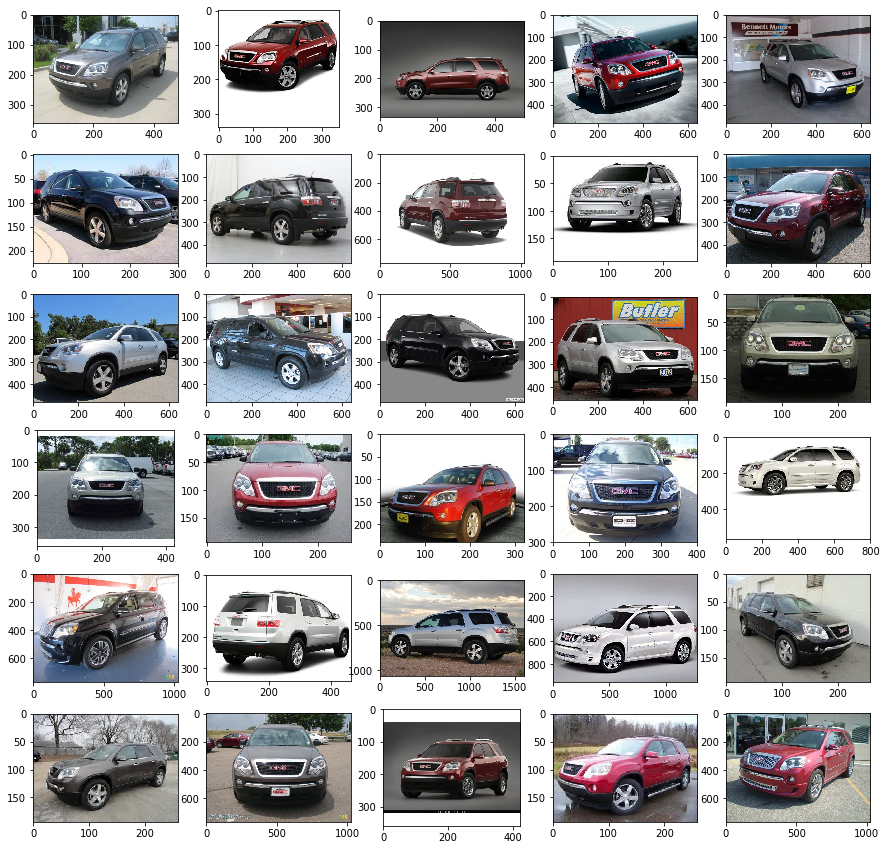

In [19]:
# Plot cars
img_names = df[df['class']==121]['relative_im_path'][:30]

plt.figure(figsize=[15,15])
i = 1
for img_name in img_names:
    img = cv2.imread("%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

## Model

In [0]:
model_name = 'efficientnet-b3'
def getModel(pret):
    model = EfficientNet.from_pretrained(model_name)
#     model._bn1 = nn.Identity()
    model._fc = nn.Linear(1536,data.c)
    return model

In [0]:
src = (
ImageList.from_df(df=res,path=PATH)
#     .use_partial_data(0.5)
    .split_by_rand_pct(0.2)
    .label_from_df()
    .add_test(ImageList.from_df(df=test_img_df,path=PATH))
)

In [0]:
# Load data to fit fastai format, with transforms
data = (
    src
    .transform(get_transforms(xtra_tfms=cutout()),size=224) # use cutout for better generalization, source: https://arxiv.org/pdf/1708.04552.pdf
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [0]:
learn = Learner(data,getModel(False),metrics=[error_rate,top_k_accuracy],model_dir='model',loss_func=LabelSmoothingCrossEntropy()).mixup().to_fp16()
# mixup and fp16 speeds up training

Loaded pretrained weights for efficientnet-b3


In [0]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,top_k_accuracy,time
0,2.412565,1.596381,0.191370,0.957599,05:29
1,2.783507,2.381407,0.418011,0.844278,05:30
2,2.646049,2.093328,0.322326,0.891932,05:30
3,2.403718,1.455913,0.142214,0.969981,05:31
4,2.202821,1.259778,0.085929,0.983114,05:28


KeyboardInterrupt: ignored

In [0]:
learn.export('/content/export.pkl')
subprocess.run("cp export.pkl '/content/gdrive/My Drive/Colab Notebooks/export_cars.pkl'", shell=True)

CompletedProcess(args="cp export.pkl '/content/gdrive/My Drive/Colab Notebooks/export_cars.pkl'", returncode=0)

In [0]:
# Load model
subprocess.run("cp '/content/gdrive/My Drive/Colab Notebooks/export_cars.pkl' export.pkl", shell=True)
learn = load_learner('/content')
learn.data = data
learn.to_fp16()

In [35]:
learn.validate(learn.data.valid_dl)[1].item()

0.03339587152004242

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


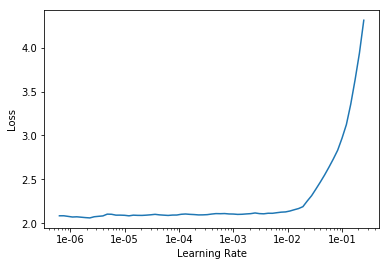

In [36]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(10,max_lr=8e-2)

epoch,train_loss,valid_loss,error_rate,top_k_accuracy,time


KeyboardInterrupt: ignored

In [0]:
learn.export('/content/export.pkl')
subprocess.run("cp export.pkl '/content/gdrive/My Drive/Colab Notebooks/export_carsunfreeze.pkl'", shell=True)

CompletedProcess(args="cp export.pkl '/content/gdrive/My Drive/Colab Notebooks/export_carsunfreeze.pkl'", returncode=0)

## Results

In [0]:
# Load model
subprocess.run("cp '/content/gdrive/My Drive/Colab Notebooks/export_cars.pkl' export.pkl", shell=True)
learn = load_learner('/content')
learn.data = data
learn.to_fp16()

In [0]:
# Error rate of loaded model
learn.validate(learn.data.valid_dl)[1].item()

0.064540334045887

In [0]:
preds,y = learn.get_preds(DatasetType.Test)

In [0]:
preds.shape

torch.Size([8041, 196])

In [0]:
results = torch.topk(preds,1)

In [0]:
out = []
for i in results[1].numpy():
    temp = ""
    for j in i:
        temp += (" "+str(data.classes[j])) 
    out.append(temp)

In [0]:
test_img_df["predicted"] = out
test_img_df.head()

,relative_im_path,class,predicted
1,car_ims/015244.jpg,185,185
3,car_ims/006954.jpg,85,85
4,car_ims/007591.jpg,93,93
5,car_ims/011532.jpg,140,185
6,car_ims/001593.jpg,20,20


In [0]:
test_img_df['predicted'] = test_img_df['predicted'].astype(int)
test_img_df['class'] = test_img_df['class'].astype(int)

In [0]:
sum(test_img_df["predicted"] == test_img_df["class"])/8041

0.86643452306927

In [0]:
test_img_df.sort('relative_im_path')["predicted"].to_csv(r'/content/gdrive/My Drive/Colab Notebooks/submission_201906170945.txt', header=None, index=None, sep=' ', mode='a')

## References

In [0]:
# Baseline code - Khursani8's Kaggle code for iNaturalist2019, https://www.kaggle.com/khursani8/fast-ai-ootb-cutout-efficientnet
# Reading Matlab matrix to Pandas df - Patrick Hayes and Scott Clark, https://github.com/sigopt/stanford-car-classification/blob/master/stanford_cars.py
# Stanford Cars Dataset - from 3D Object Representations for Fine-Grained Categorization by Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei; presented at 4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.